# Rough Calculations for spinon tight-binding hopping

## Geometry
Define the constants
$$\begin{align*}
b_{0}&= \frac{1}{4}(-1,\ -1,\ -1)\\
b_{1}&= \frac{1}{4}(+1,\ -1,\ -1)\\
b_{2}&= \frac{1}{4}(-1,\ +1,\ -1)\\
b_{3}&= \frac{1}{4}(-1,\ -1,\ +1)
\end{align*}$$

| Symbol                                                            | Meaning                                                  |
| ----------------------------------------------------------------- | -------------------------------------------------------- |
| $r, s, \mathbf{r, s}, r_{\alpha}, x$                              | Diamond lattice (tetrahedron) site (sublattice $\alpha$) |
| $i,j,r_A+b_\mu/2, r_B - b_\mu/2, r_\alpha + \eta_\alpha b_\mu/2$  | Pyrochlore lattice site                                  |
| $\mu, \nu$                                                        | Pyrochlore sublattice (0,1,2,3)                        |
| $\eta_{\alpha}, \eta_x$                                           | = +1 on 'up' / A tetrahedra, -1 on 'down' / B.           |


Standard practice is to index operators by their position in real-space based on the diamond FCC lattice. We write spins using the notation
$S^{z}_{r_{\alpha}+\eta_{\alpha}b_\mu/2}$
to mean "the spin belonging to the tetrahedron at $r_{\alpha}$ on sublattice $\mu$". This is rather cumbersome, so in these notes we will abbreviate this to 
$S^z_{r_\alpha,\mu}$


## GMFT expansion
The Hamiltonian, without magnetic field, reads
$$
\begin{align}
H_{XYZ} =& \frac{J_{zz}}{2}\sum_{r_{\alpha}} Q_{r_{\alpha}}^{2} + \frac{J_{\pm}}{2}\sum_{r_{\alpha}}\sum_{\mu \neq \nu} S^{+}_{r_\alpha,\mu}S^{-}_{r_{\alpha},\nu} + h.c.\\
&+J_{\pm\pm}\sum_{r_{\alpha}}\sum_{\mu \neq \nu} S^+_{r_{\alpha},\mu}S^+_{r_{\alpha},\nu}+h.c.\\
% &+\sum_{\langle i j \rangle} \frac{J_\pm}{2} (\sigma_i^+\sigma_j^- + \sigma_i^-\sigma_j^+ )
&-\sum_{r_A, \mu} \frac{\boldsymbol{\hat{z}}_i \cdot \boldsymbol{B}}{2}
(S^+_{r_A,\mu} + S^-_{r_A,\mu}) 
\, . \nonumber
\end{align}
$$

After aplying the mapping
$$
\begin{align}
S^{+}_{r_{A},\mu} &= \frac{1}{2}\phi^{+}_{r_A}e^{iA_{r_{A},r_{A}+b_{\mu}}} \phi^-_{r_A+b_\mu}
\end{align}
$$

where $\phi$ is the spinon rotor creator/destroyer.

This generates the action
$$
\begin{align}
S_{GMFT} =& \int d\tau\sum_{x\in \rm Tetras} \frac{1}{2J_{zz}}\partial_{\tau}\phi^{*}_{x\tau}\partial_{\tau}\phi_{x \tau} + i \lambda_{x \tau}(\phi_{x \tau}^{*}\phi_{x \tau} -1) + H_{GMFT}
\\
H_{GMFT} =& + \frac{J_{\pm}}{8}\sum_{r_{\alpha}}\sum_{\mu \neq \nu} \phi^{+}_{r_{\alpha}+\mu}\phi^{-}_{r_{\alpha}+\nu}e^{i\eta_x(A_{r,r+\nu}-A_{r,r+\mu})} \\
&+\frac{J_{\pm\pm}}{8}\sum_{r_{\alpha}}\sum_{\mu \neq \nu} \phi^+_{r_{\alpha}}\phi^+_{r_{\alpha}}\phi^-_{r_{\alpha}+\mu}\phi^-_{r_{\alpha}+\nu}e^{i\eta_x(A_{r,r+\nu}+A_{r,r+\mu})}+h.c.\\
&-\sum_{r_A, \mu} \frac{\boldsymbol{\hat{z}}_\mu \cdot \boldsymbol{B}}{4} \left[ \phi_{r_A}^+ e^{iA_{r_A, r_A+b_\mu} } \phi_{r_A + b_\mu}^-  + h.c.\right]
\end{align}
$$

(For now, drop the $J_{\pm\pm}$ term since it makes life harder)


The GMFT action now reads



## The workflow
We know the correct Ansatz for the 0-flux, $\pi$-flux and $\pi\pi00$ states, FF presents additional complications (specifically, it generally needs somewhat large unit cells to contain the a pattern -  e.g. $3\pi/4, \pi/4,\pi/4,\pi/4$ needs a $2\times 2 \times 2$ cubic cell).  Since it is non quantised, have
$\Phi_\mu(J_{\pm}, \boldsymbol{B})$
which then get fed back in to the mean-field $A$ Ansatz.

## Saddle Point approximation for the quartic term

We can use the MF decoupling

$$
\begin{align*}
ss\phi_1^{+}\phi_2^{+}\phi_{3}\phi_{4} \mapsto \langle s \rangle\langle s \rangle\Big[\langle \phi_{1}^+\phi_{2}^+\rangle\phi_{3}^-\phi_{4}^- +  \phi_{1}^+\phi_{2}^+\langle\phi_{3}^-\phi_{4}^-\rangle\\
+\langle \phi_{1}^+\phi_{3}^-\rangle\phi_{2}^+\phi_{4}^- +  \phi_{1}^+\phi_{3}^-\langle\phi_{2}^+\phi_{4}^-\rangle\\
\langle \phi_{1}^+\phi_{4}^-\rangle\phi_{2}^+\phi_{3}^- +  \phi_{1}^+\phi_{4}^-\langle\phi_{2}^+\phi_{3}^-\rangle
\Big]
\end{align*}
$$

to render the Hamiltonian quadratic.



In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

region = opt.LinearConstraint(np.eye(4), lb=-np.pi*np.ones(4),ub=(np.pi+0.1)*np.ones(4) )

def energy_cost(b, gvec):
    return np.dot(gvec, np.cos(b))

def energy_der(b, gvec):
    return gvec* -np.sin(b)

def energy_hess(b, gvec):
    return -np.diag(gvec* np.cos(b))

def best_flux_fast(gvec, guess = [0,0,0,0]):
    best_fun = np.sum(np.abs(gvec)) +1
    res = None

    for s in [-2*np.pi, 0, 2*np.pi, 4*np.pi]:
        vison = opt.LinearConstraint(np.ones(4), s,s)
        r = opt.minimize(energy_cost, guess, args=gvec,
                       method='trust-constr',
                       constraints = [region, vison],
                       jac = energy_der,
                       hess= energy_hess
                       )
        if r['fun'] < best_fun:
            best_fun = r['fun']
            res = r

        
    return res


In [2]:
# Quantisation denominator = 4 L^2 
N = (4*4**2) 



def find_g(phi_set):

    flux_guess = [-np.pi,np.pi/3,np.pi/3,np.pi/3]
    
    def objective(x):
        return np.sum(-np.cos(phi_set - best_flux_fast([1,x[0],x[1],x[2]],flux_guess).x))
    
    # guess = -1+2*np.cos(2*phi_set[1]-np.pi)
    guess=-0.25
    
    # print(guess)
    
    r2 = opt.LinearConstraint(np.eye(3), ub=np.zeros(3), lb=np.ones(3)*-0.5 )
    
    res = opt.minimize(objective, (guess,guess,guess),constraints=r2,tol=1e-16)
    
    # print(res.message)
    G= [1, res.x[0], res.x[1], res.x[2]]
    print("G = ",G)

    phi_res = best_flux_fast(G,flux_guess).x
    
    print(f"set  phi = {phi_set*N/2/np.pi} π/{N//2}" )
    print(f"real phi = {phi_res*N/2/np.pi} π/{N//2}" )
    
    print(res)

    return G


In [3]:
nx = 10
ny = 10
nz = 10

phi_set = np.array([-nx-ny-nz, nx, ny, nz])*2*np.pi/N

# g111 = find_g(phi_set)
phi_set

array([-2.94524311,  0.9817477 ,  0.9817477 ,  0.9817477 ])

In [4]:
nx = 8
ny = 10
nz = 12

phi_set = np.array([-nx-ny-nz, nx, ny, nz])*2*np.pi/N

# g111 = find_g(phi_set)
phi_set

array([-2.94524311,  0.78539816,  0.9817477 ,  1.17809725])

In [5]:
# g1_vec = np.linspace(-0.4,-0.1,100)

# fluxes = []
# for g1 in g1_vec:
#     fluxes.append(best_flux_fast([1,g1,g1,g1],[-np.pi,np.pi/3,np.pi/3,np.pi/3]).x)

# F = np.array(fluxes)



In [6]:
# plt.plot(g1_vec,F[:,1],label='$\phi_1$')
# plt.plot(g1_vec,F[:,2],label='$\phi_2$')
# plt.plot(g1_vec,F[:,3],label='$\phi_3$')

# plt.xlabel(r"$g_1/g_0$")
# plt.axhline( 2 * np.pi * 10 / N, color='r')

# plt.legend()

In [1]:
import pyrochlore_geometry as geom
import scipy.sparse as sp
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt


def wrap_cube(xyz, L):
    # remaps the argument to lie in [0,8L]^3
    xyz %= 8*L


In [2]:

def load_gauge(afile): 

    data = np.genfromtxt(afile, names=True)
    
    L = (len(data)/16)**(1/3)
    
    if np.abs(int(L) - L) > 1e-10:
        print("WARN: L is noninteger")
    
    L = int(L)
    
    N_tetra = 8*L**3

    A = np.zeros((N_tetra//2, 4))

    for row in data:
        xyz = np.array([row['X'], row['Y'], row['Z']], dtype=np.int32)
        gauge_conn = row['A']
        pyro_sl = int(row['pyro_sl'])
        
        from_tetra = xyz - geom.pyro[pyro_sl]
        to_tetra = xyz + geom.pyro[pyro_sl]    
    
        idx_from = geom.get_tetra_idx(from_tetra, L)
        idx_to = geom.get_tetra_idx(to_tetra, L)

        # These should all be 'A' tetrahedra
        
        assert(idx_from%2 == 0) 
        # assert(np.allclose( A[idx_from, pyro_sl], 0))
        A[idx_from//2, pyro_sl] = gauge_conn
        # A[idx_to, pyro_sl] = -gauge_conn
    return A, L

In [3]:
## Returns the SL of the tetrahedron 
def get_tetra_idx(xyz, L):
    # if type(L) is int:
    #     L = [L,L,L]
    X = xyz.copy()

    xyz = xyz % (L*8)
    
    updown = 0
    if np.all((xyz - geom.diamond[1]) %4 == 0):
        updown = 1
        xyz -= geom.diamond[1]
        
    if not np.all(np.mod(xyz,4) == 0):
        print(f"Site at {X} wrong: bad diiamond SL")

    fcc = -1
    for mu, X in enumerate(geom.fcc_Dy):
        if np.all((xyz - X) %8 == 0):
            fcc = mu
            xyz = xyz - X
            break
        
    if not np.all(xyz%8 == 0):
        print(f"Site at {X} wrong: bad cell {fcc}")
    
    xyz = (xyz//8) % L
    
    cell = (xyz[0]*L+xyz[1])*L+xyz[2];
    return 8*cell + 2*fcc + updown

In [186]:

def get_spin_sl(xyz):

    for mu, X in enumerate(geom.pyro):
        if np.all((xyz - X) %4 == 0):
            return mu
    return None

In [4]:
# load the A field and build the Hamiltonian

def get_tetra_locs(L):
    tetra_locs = np.zeros((8*L**3,3),dtype=np.int32)
    for ix in range(L):
        for iy in range(L):
            for iz in range(L):
                cell = (ix*L + iy)*L + iz
                cell_loc = np.array([8*ix, 8*iy, 8*iz])
                for mu, fcc in enumerate(geom.fcc_Dy):
                    tetra_locs[ 8*cell + 2*mu + 0 ] =  cell_loc + fcc + geom.diamond[0]
                    tetra_locs[ 8*cell + 2*mu + 1 ] =  cell_loc + fcc + geom.diamond[1]

    # sanity check
    for J in range(8*L**3):
        eta = 1 if J%2 == 0 else -1
        
        assert( geom.get_tetra_idx( tetra_locs[J], L ) == J )
    return tetra_locs




In [378]:
def local_spec(K, A, Jpm = -1):
    # expects K to be a list of K points, e.g. [k1, k2, k3, ...]
    
    L = (len(A)/4)**(1/3)
    assert( np.abs(int(L) - L) < 1e-10)
    L = int(L)
    num_tetra = (L**3)*8
    K = np.array(K)
    
    H = np.zeros((K.shape[0], num_tetra, num_tetra),dtype=np.complex128)
    tetra_locs = get_tetra_locs(L)
    
    for J0, x0 in enumerate(tetra_locs):
        eta = 1 - 2*(J0%2)
        for mu in range(4):
            for nu in np.mod(mu + np.array([1,2,3]), 4):
                x1 = x0 + eta*2*geom.pyro[mu]
                x2 = x0 + eta*2*geom.pyro[nu]

                J1 = get_tetra_idx(x1, L)
                J2 = get_tetra_idx(x2, L)
                
                if eta == 1:
                    # 'A' tetrahedron
                    H[:, J1, J2] += Jpm/4*np.exp(1.0j*(A[J0//2,mu] - A[J0//2,nu]) - 1.0j*K@(x1-x2))
                else:
                    H[:, J1, J2] += Jpm/4*np.exp(1.0j*(-A[J1//2,mu] + A[J2//2,nu]) - 1.0j*K@(x1-x2))
    
    return np.sort(LA.eigvalsh(H),axis=-1)
    

In [13]:
high_symmetry_points = {
    '\\Gamma': [0.,0.,0.],
    'X': [1.,0.,0.],
    'W': [1.,0.5,0.],
    'K': [0.75,0.75,0.],
    'L': [0.5,0.5,0.5],
    'U': [1.0, 0.25,0.25]
} 
# high_symmetry_points_2 = {
#     '\\Gamma': [0.,0.,0.],
#     'X': [0.,1.,0.],
#     'W': [0.,1.,0.5],
#     'K': [0.,0.75,0.75],
#     'L': [0.5,0.5,0.5],
#     'U': [0.25, 1.0, 0.25]
# } 
path = '\\Gamma X W K \\Gamma L U W'.split()
# high_symmetry_points = {
#     'G1': [0,0,0],
#     'G2': [2,0,0],
#     'G3': [4,0,0]
# }
# path = ['G1', 'G2', 'G3']

tpath, kpath, ticks = geom.generate_path(high_symmetry_points, path, 50)

In [532]:
# load A and build the Hamiltonian

file_0 = "/Users/alaricsanders/gh/QSI/data/a_finding/0_flux_manual.gauge"
A_zero, _ = load_gauge(file_0)

A1, L = load_gauge("/Users/alaricsanders/gh/QSI/data/a_finding/0_flux%001.gauge")
A2, L = load_gauge("/Users/alaricsanders/gh/QSI/data/a_finding/0_flux%002.gauge")
A3, L = load_gauge("/Users/alaricsanders/gh/QSI/data/a_finding/0_flux%003.gauge")
# A4, L = load_gauge("/Users/alaricsanders/gh/QSI/data/a_finding/0_flux%211.gauge")

A_big, L_big = load_gauge("/Users/alaricsanders/gh/QSI/data/a_finding/0_flux_big.gauge")

N_tetra = 8*L**3
tetra_locs = get_tetra_locs(L)

# file = "/Users/alaricsanders/gh/QSI/data/a_finding/pi_flux.gauge"


# # manual piflux
A_piflux = np.zeros((4, 4))
A_piflux[0,:] = np.array([0,0,1,1])*np.pi
A_piflux[2,:] = np.array([0,0,1,1])*np.pi

# # manual pi2flux
A_pi2flux = np.zeros((4, 4))
A_pi2flux[1,:] = np.array([0,-1,1,0])*np.pi/2
A_pi2flux[2,:] = np.array([0,0,0,2])*np.pi/2
A_pi2flux[3,:] = np.array([0,1,1,0])*np.pi/2
calc_fluxes(A_pi2flux)

array([[-1.57079633, -1.57079633, -1.57079633, -1.57079633],
       [-1.57079633, -1.57079633, -1.57079633, -1.57079633],
       [-1.57079633, -1.57079633, -1.57079633, -1.57079633],
       [-1.57079633, -1.57079633, -1.57079633, -1.57079633]])

In [506]:
B_tetras = [[ (get_tetra_idx(tetra_locs[i]-2*geom.pyro[mu],1)//2, mu) for mu in range(4)] for i in range(1,8,2) ]  
def gauge_tetra(i):
    aa = np.zeros((4,4))
    if i%2 == 0:
        aa[i//2, :] += 1
    else:
        for j, mu in B_tetras[(i-1)//2]:
            aa[j, mu] += 1
    return aa

In [881]:
def mod2pi(x):
    return np.mod(x +np.pi,2*np.pi) - np.pi

def simplify_gauges(A):
    # fixes the gauge. Not completely-there are sitll discrete gauge transforms left after this.
    
    # uses the spanning tree
    # [0,0] [0,1] [0,2] [0,3]
    # [1,1] [2,2] [3,3]
    Anew = mod2pi(np.copy(A))

    # can subtract arbitrary numbers so long as I do it on every FCC Sl
    means = np.mean(Anew, axis=0)
    Anew[:,0] -= means[0]
    Anew[:,1] -= means[1]
    Anew[:,2] -= means[2]
    Anew[:,3] -= means[3]
    Anew = mod2pi(Anew)
    
    Anew -= gauge_tetra(0)*Anew[0,0]
    Anew -= gauge_tetra(2)*Anew[1,1]
    Anew -= gauge_tetra(4)*Anew[2,2]
    Anew -= gauge_tetra(6)*Anew[3,3]
    
    Anew -= gauge_tetra(3)*Anew[0,1]
    Anew -= gauge_tetra(5)*Anew[0,2]
    Anew -= gauge_tetra(7)*Anew[0,3]

   

    assert np.allclose(calc_fluxes(Anew) - calc_fluxes(A), 0)
    
    return Anew


def elem(i, mu):
    z = np.zeros((4,4))
    z[i,mu] = 2*np.pi
    return z


In [882]:
import matplotlib as mpl
import itertools
traces = [
]

cmap = mpl.colormaps['Accent']

# traces.append(( simplify_gauges(A1), dict(ls='--'), 0 ))
# traces.append(( simplify_gauges(A2), dict(ls='--'), [1/2,1/2,1/2] ))
# traces.append(( simplify_gauges(A3), dict(ls='--'), 0 ))
# traces.append(( simplify_gauges(A4), dict(ls='--'), 0 ))

# traces.append(( A_big, dict(color='k',ls='-',lw=0.4),[0.75,0.75,0] ))

traces.append(( A_piflux, dict(ls='-'), [0,0,0] ))
# traces.append(( A_pi2flux, dict(ls='-'), [0,0,0.25] ))
# A4p = np.array([A4[j] - A4[j][0] for j in range(4)])
# print(A4p)
# traces.append(( A4p[perm,:], dict(ls=':') ))
# traces.append(( A4pp[perm,:], dict(ls=':') ))


# traces.append(( A_zero, dict(ls=':', color='r'),0))

In [ ]:

# build a random test A
# A_test = np.copy(A_zero)

# for i in range(8):
#     A_test += gauge_tetra(i)*(1.-2.*np.random.rand())
# for i in range(16):
#     A_test += elem(np.random.randint(0,4),np.random.randint(0,4))

# dk = np.array([1,.2,3])
# shift_A = np.copy(A_test)

# shift_A += np.array([ [np.sum(dk), dk[0],dk[1],dk[2]] for i in range(4) ])



# traces.append(( A_test, dict(ls='-'), 0))
# traces.append(( remove_winding(A_test), dict(ls='--'), 0))


# traces.append(( shift_A, dict(ls='-'), dk/np.pi))
# traces.append(( shift_A, dict(ls='-'), 0))
# traces.append(( remove_winding(shift_A) , dict(ls='--',color='k'), 0 ))

[Text(0.0, 0, '$\\Gamma$'),
 Text(1.0, 0, '$X$'),
 Text(1.5, 0, '$W$'),
 Text(1.8535533905932737, 0, '$K$'),
 Text(2.914213562373095, 0, '$\\Gamma$'),
 Text(3.7802389661575333, 0, '$L$'),
 Text(4.392611401853328, 0, '$U$'),
 Text(4.746164792446602, 0, '$W$')]

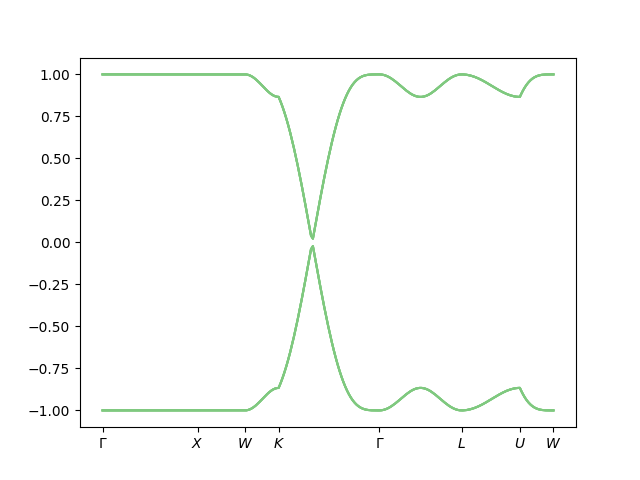

In [883]:
plt.close('all')
fig, ax = plt.subplots()

for j, (A, kwa, shift) in enumerate(traces):
    y = []
    # L = int((A.shape[0]//4)**(1/3))
    L=1
    E = local_spec((kpath+shift)*2*np.pi/8/L, A)
    y.append(E)

    kwargs = dict(color=cmap(j/10))
    for k in kwa:
        kwargs[k] = kwa[k]
    ax.plot(tpath, y[0],**kwargs)


ax.set_xticks(ticks)
ax.set_xticklabels(f'${x}$' for x in path)
# plt.legend()


In [864]:
np.round(simplify_gauges(A3)/np.pi)

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0., -0., -0.],
       [-0., -0.,  0., -0.],
       [-0., -0.,  0.,  0.]])

In [409]:
# def get_hexagons_v1(L):
#     plqt =  [(1,2,0),(0,2,3),(0,3,1),(2,1,3),]
#     retval = []
#     for tA in geom.fcc_Dy:
#         row = []
#         for dirs in plqt:
#             hexa = []
            
#             t = np.copy(tA)
#             for i in range(6):
#                 direction = dirs[i%3]
#                 if i%2 == 0:
#                     J = get_tetra_idx(t,1)//2
#                     hexa.append((J, direction))
#                     t += 2*geom.pyro[direction]
#                 else:
#                     t -= 2*geom.pyro[direction]
#                     J = get_tetra_idx(t,1)//2
#                     hexa.append((J, direction))
#             row.append(hexa)
#         retval.append(row)
#     return retval
    


# def construct_fluxes(A):
    
#     Phi = np.ones((A.shape[0], 4),dtype=np.complex128)
#     hexa_sites = get_hexagons_v1(1)
#     for I, row in enumerate(hexa_sites):
#         for nu, hex in enumerate(row):
#             for i, (J, sl) in enumerate(hex):
#                 Phi[I][nu] *= np.exp(1j * A[J, sl] * (-1)**i )
#     p1 = np.angle(Phi)

#     p2 = np.zeros_like(p1)
#     p2[:, 0] = p1[[1,0,3,2],3]
#     p2[:, 1] = p1[[3,2,1,0],1]
#     # p2[:, 2] = p1[[0,1,2,3],2]
#     p2[:, 2] = p1[[1,0,3,2],2]
#     p2[:, 3] = p1[[1,0,3,2],0]

    
#     return p2
            
            
# for aa in (A_zero, A1, A2, A3, A4):
#     print(np.linalg.norm(np.exp(1.0j*construct_fluxes(aa))-1) )
    

0.0
4.215539985361409e-06
1.039440925044262e-05
7.102295861180013e-06
7.293484432042979e-06


In [399]:
name = "0_flux%211"
# name = ""
Api1, _ = load_gauge(f"/Users/alaricsanders/gh/QSI/data/a_finding/{name}.gauge")
B1 = np.genfromtxt(f"/Users/alaricsanders/gh/QSI/data/a_finding/{name}_B.csv",names=True)['B']




In [397]:
def get_dual_fcc_locations(L):
    locs = []
    for ix in range(L):
        for iy in range(L):
            for iz in range(L):
                cell = 8*np.array([ix,iy,iz])
                for fcc in range(4):
                    locs.append(cell + geom.fcc_Ti[fcc])
    return locs

def get_hexagons(L):
    hexa_sites = [] # index by hexa_sites[dual_fcc_idx][sl] -> 6-member arr
    for I, r in enumerate(get_dual_fcc_locations(L)):
        row = []
        for mu in range(4):
            r_plaq = r + geom.pyro[mu]
            spin_sites = [r_plaq+y for y in geom.plaqt[mu] ]

            row.append([])
            for j, s in enumerate(spin_sites):
                nu = get_spin_sl(s)
                fcc = s - geom.pyro[nu]
                J = get_tetra_idx(fcc,L)//2
                row[-1].append((J, nu))
                
        hexa_sites.append(row)
    return hexa_sites

def calc_fluxes(A):
    L = int( (A.shape[0]/4)**(1/3) )
    Phi = np.ones((A.shape[0], 4),dtype=np.complex128)
    hexa_sites = get_hexagons(L)
    for I, row in enumerate(hexa_sites):
        for nu, hex in enumerate(row):
            for i, (J, sl) in enumerate(hex):
                Phi[I][nu] *= np.exp(1j * A[J, sl] * (-1)**i )
   
    return np.angle(Phi)

In [403]:
Phi_v1 = construct_fluxes(Api1)
Phi_v2 = calc_fluxes(Api1)

for mu in range(4):
    print("###### mu=",mu)
    for I, (x1, x2) in enumerate(zip(Phi_v1[:,mu], Phi_v2[:,mu])):
        print(x1,x2, B1[4*I + mu])

# all three are in agreement! The geometry is apparrently correct!


###### mu= 0
-1.466157728613996e-06 -1.466157728502974e-06 -1.466157728784044e-06
6.520517020769851e-07 6.520517020769851e-07 6.52051702023746e-07
9.934108324007287e-07 9.934108324284843e-07 9.934108324315046e-07
-1.7930480583627882e-07 -1.7930480586403436e-07 -1.793048059482956e-07
###### mu= 1
-6.913015088983451e-07 -6.913015088983451e-07 -6.913015089005512e-07
1.5054075356296794e-06 1.5054075356296794e-06 1.5054075355274933e-06
4.6451542101701434e-07 4.6451542101701434e-07 4.645154209626227e-07
-1.2786214476093893e-06 -1.2786214476093893e-06 -1.278621447669525e-06
###### mu= 2
-9.622185991321849e-07 -9.622185988823847e-07 -9.622185989346922e-07
-3.4048884516923185e-06 -3.404888451747829e-06 -3.404888451652724e-06
1.4349654951511455e-06 1.4349654950401232e-06 1.434965495099411e-06
2.932141555560302e-06 2.932141555560301e-06 2.9321415557217563e-06
###### mu= 3
3.1196778365933466e-06 3.119677836621102e-06 3.119677836573554e-06
1.2474292142020576e-06 1.2474292140355241e-06 1.24742921398

In [377]:
# okay, fixed it - geometry is sound, unfortunately.
geom.pyro

array([[ 1,  1,  1],
       [ 1, -1, -1],
       [-1,  1, -1],
       [-1, -1,  1]], dtype=int32)

[0 0 0]
[2 2 2]
[0 4 4]
[2 6 6]
[4 0 4]
[6 2 6]
[4 4 0]
[6 6 2]


(0.0, 8.0)

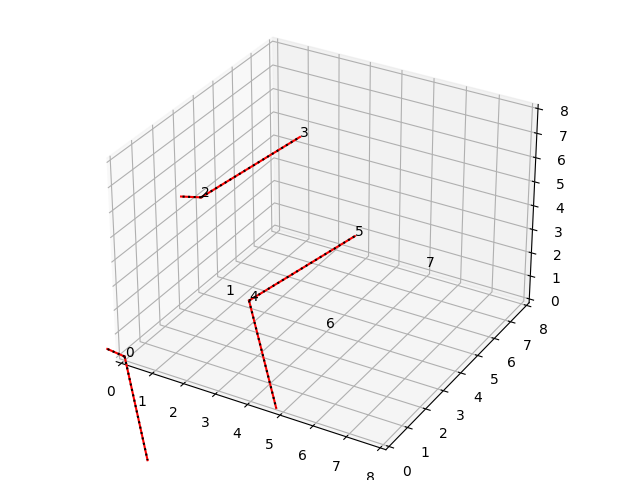

In [385]:
%matplotlib widget
plt.close('all')

fig3d = plt.figure()
fig3d.clf()
ax3d = fig3d.add_axes([0,0,1,1],projection='3d')

for j, tl in enumerate(tetra_locs):
    print(tl)
    ax3d.text(*tl, j)


hexas =  get_hexagons(1)[3][3]

hexas_v1 =  get_hexagons_v1(1)[2][0]

for J, mu in hexas:
    ax3d.plot( *np.array(tetra_locs[2*J] + np.outer([0,2],geom.pyro[mu])).T, 'r')

for J, mu in hexas_v1:
    ax3d.plot( *np.array(tetra_locs[2*J] + np.outer([0,2],geom.pyro[mu])).T, 'k:')
    

ax3d.set_xlim([0,8])
ax3d.set_ylim([0,8])
ax3d.set_zlim([0,8])

# fig3d.show()


In [252]:
get_hexagons(1)[0][1]

[(3, 0), (1, 2), (1, 3), (2, 0), (2, 2), (3, 3)]